In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import datetime

March 10, 2020 - university announces move to online 
https://statements.cornell.edu/2020/20200310-coronavirus-update.cfm

<s> August 26, 2021 - start of fall semester, required in person <s/>
https://covid.cornell.edu/updates/20210803-preparing-for-fall.cfm

September 2, 2020 - Reid says so
https://registrar.cornell.edu/academic-calendar/2020-2021

In [2]:
start = datetime.datetime(2020, 3, 10)
end = datetime.datetime(2020, 9, 2)

In [3]:
bethe = pd.read_csv('BetheData.csv')
duff = pd.read_csv('DuffieldData.csv')

In [4]:
bethe['Time'] = pd.to_datetime(bethe['Time'])
bethe = bethe.rename(columns={'HansBetheHouse.Elec.PowerScout3/kWsystem':'kw'})
bethe.head()

,Time,kw
0,2018-04-11 20:00:00,263
1,2018-04-12 20:00:00,260
2,2018-04-13 20:00:00,250
3,2018-04-14 20:00:00,255
4,2018-04-15 20:00:00,263


-0.23924671034803419


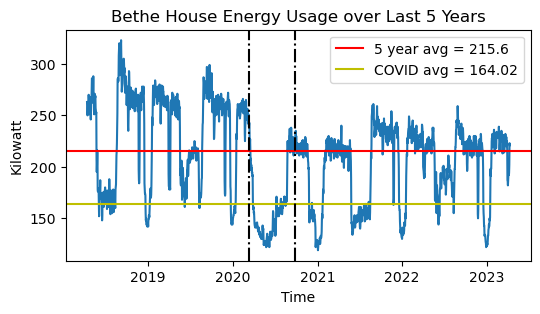

In [5]:
plt.figure(figsize=(6,3))
plt.title('Bethe House Energy Usage over Last 5 Years')
plt.ylabel('Kilowatt')
plt.xlabel('Time')
plt.plot(bethe['Time'],bethe['kw'])

betheNotCovid = bethe[(bethe['Time']<start) | (bethe['Time']>end)]
betheNotCovidAvg = betheNotCovid['kw'].mean()
plt.axhline(y=betheNotCovid['kw'].mean(), color='r', label='5 year avg = {}'.format(round(betheNotCovidAvg,2)))

betheCovid = bethe[(bethe['Time']>=start) & (bethe['Time']<end)]
betheCovidAvg = betheCovid['kw'].mean()
plt.axhline(y=betheCovid['kw'].mean(), color='y', label='COVID avg = {}'.format(round(betheCovidAvg,2)))

plt.axvline(x=start, color='black', linestyle='-.')
plt.axvline(x=end, color='black', linestyle='-.')
plt.legend()

print((betheCovidAvg-betheNotCovidAvg)/betheNotCovidAvg)

In [6]:
duff['Time'] = pd.to_datetime(duff['Time'])
duff = duff.rename(columns={'DuffieldHall.Elec.PowerScout3/kWsystem':'kw'})
duff.head()

,Time,kw
0,2018-04-11 20:00:00,872
1,2018-04-12 20:00:00,892
2,2018-04-13 20:00:00,872
3,2018-04-14 20:00:00,858
4,2018-04-15 20:00:00,864


-0.0827875592036252


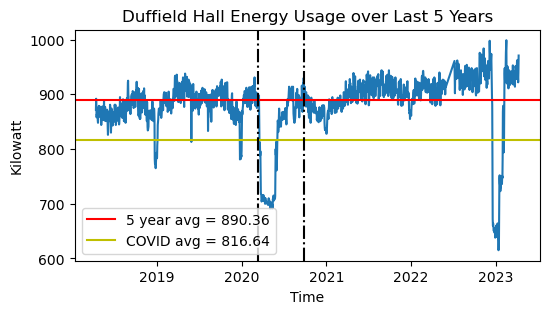

In [7]:
plt.figure(figsize=(6,3))
plt.title('Duffield Hall Energy Usage over Last 5 Years')
plt.ylabel('Kilowatt')
plt.xlabel('Time')
plt.plot(duff['Time'],duff['kw'])

duffNotCovid = duff[(duff['Time']<start) | (duff['Time']>end)]
duffNotCovidAvg = duffNotCovid['kw'].mean()
plt.axhline(y=duffNotCovid['kw'].mean(), color='r', label='5 year avg = {}'.format(round(duffNotCovidAvg,2)))

duffCovid = duff[(duff['Time']>=start) & (duff['Time']<end)]
duffCovidAvg = duffCovid['kw'].mean()
plt.axhline(y=duffCovid['kw'].mean(), color='y', label='COVID avg = {}'.format(round(duffCovidAvg,2)))

plt.axvline(x=start, color='black', linestyle='-.')
plt.axvline(x=end, color='black', linestyle='-.')
plt.legend()

print((duffCovidAvg-duffNotCovidAvg)/duffNotCovidAvg)